In [22]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import loadtxt
import pandas as pd
from scipy.optimize import curve_fit
from scipy import optimize 
from matplotlib import rc
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams['axes.linewidth'] = 0.4 #set the value globally
plt.rcParams['xtick.major.width'] = 0.4
plt.rcParams['ytick.major.width'] = 0.4

# Wilberfoce pendulum

A Wilberforce pendulum, invented by British physicist Lionel Robert Wilberforce around 1896,[1] consists of a mass suspended by a long helical spring and free to turn on its vertical axis, twisting the spring. It is an example of a coupled mechanical oscillator, often used as a demonstration in physics education. The mass can both bob up and down on the spring, and rotate back and forth about its vertical axis with torsional vibrations. When correctly adjusted and set in motion, it exhibits a curious motion in which periods of purely rotational oscillation gradually alternate with periods of purely up and down oscillation. The energy stored in the device shifts slowly back and forth between the translational 'up and down' oscillation mode and the torsional 'clockwise and counterclockwise' oscillation mode, until the motion eventually dies away.



Let's read and plot the data for vertical oscillation.

In [23]:
df = pd.read_csv('z_data.csv',sep=",", header=None)

In [24]:
df.columns = ['t', 'z']
t_vert = df['t']
z_vert = df['z'] 

The solution for the vertical moviment is given by 
\begin{equation}
z(t) = A_z \cos\left(\frac{\omega_b t}{2}\right)\cos(\omega t)
\end{equation}
Then, we set a fit which yields
\begin{equation}
z(t) = A \cos(Bt)\cos(C t)
\end{equation}

In [25]:
def model_fit(x, a, b, c):
    return a*(np.cos(b*x))*(np.cos(c*x))

In [26]:
parameters, covariance = curve_fit(model_fit, t_vert, z_vert, p0=[0.257,0.404,4.884])

In [27]:
#a_opt, b_opt, c_opt = [0.12,0.51,5.21]
a_opt, b_opt, c_opt = parameters 
t_model = np.linspace(min(t_vert), max(t_vert), 200)
t = np.linspace(0,13,100)
z_model = a_opt*np.cos(b_opt*t_model)*np.cos(c_opt*t_model)

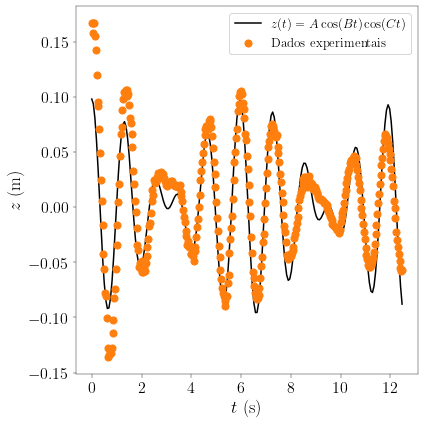

In [28]:
#plot experimental data and fit
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(t_vert,z_vert,label='Dados experimentais',color='tab:orange',s=50)
ax.plot(t_model,z_model, color='k',label=r'$z(t)=A\cos(Bt)\cos(Ct)$',lw=1.5,zorder=0)
ax.set_ylabel(r'$z$ (m)',fontsize=18)
ax.set_xlabel (r'$t$ (s)',fontsize=18)
ax.tick_params(axis='both',labelsize=16)
plt.locator_params(axis='x', nbins=10)
ax.legend(fontsize=13)
#plt.grid()
ax.set_aspect('auto',adjustable='box')
plt.tight_layout()
fig.savefig('z_t_result.pdf',dpi=100)
plt.show()

The standard error of the fitting values is given by the 
\begin{equation}
std = \sqrt{\text{covariance}}\,,
\end{equation}
where the covariance array is an output of curve_fit.

In [29]:
std = np.sqrt(np.diag(covariance))

In [30]:
print(50*'=')
print('Fit: parameters'.center(50,' '))
print(50*'-')
print('a = {:.4}±{:.4}'.format(parameters[0],std[0]))
print('b = {:.4}±{:.4}'.format(parameters[1],std[1]))
print('c = {:.4}±{:.4}'.format(parameters[2],std[2]))
print(50*'=')

                 Fit: parameters                  
--------------------------------------------------
a = 0.09799±0.002371
b = 0.5004±0.003372
c = 4.752±0.003217


Now, we need to read and plot the data for rotational oscillation, $\theta(t)$.

In [31]:
df = pd.read_csv('theta_data.csv',sep=",", header=None)

In [32]:
df.columns = ['t', 'theta']
t_theta = df['t']
theta = df['theta'] 

The solution for the rotational moviment reads 
\begin{equation}
\theta(t) = A_\theta \sin\left(\frac{\omega_b t}{2}\right)\sin(\omega t)
\end{equation}
Then, we set a fit which yields
\begin{equation}
\theta(t) = A \sin(Bt)\sin(C t)
\end{equation}

In [33]:
def model_fit(x, a, b, c):
    return a*(np.sin(b*x))*(np.sin(c*x))

In [34]:
parameters, covariance = curve_fit(model_fit, t_theta, theta, p0=[1.1,0.3,4.7])

In [35]:
a_opt, b_opt, c_opt = parameters 
t_model = np.linspace(min(t_vert), max(t_vert), 200)

theta_model = a_opt*np.sin(b_opt*t_model)*np.sin(c_opt*t_model)

In [36]:
std = np.sqrt(np.diag(covariance))
print('==========Fit parameters==========')
print('A = {:.3}±{:.1}'.format(np.abs(parameters[0]),std[0]))
print('B = {:.3}±{:.0}'.format(np.abs(parameters[1]),std[1]))
print('C = {:.4}±{:.1}'.format(np.abs(parameters[2]),std[2]))
print('==================================')

==========Fit parameters==========
A = 1.09±0.03
B = 0.513±0.003
C = 4.802±0.004


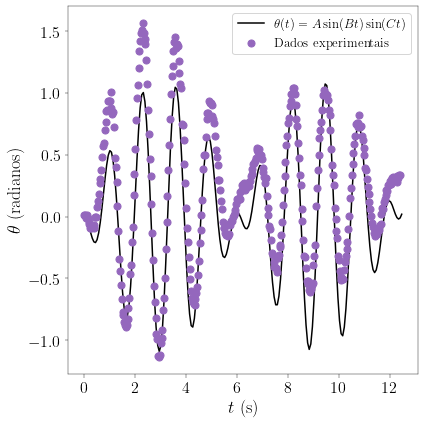

In [37]:
#plot expeerimental data and fit
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(t_theta,theta,label='Dados experimentais',color='tab:purple',s=50)
ax.plot(t_model,theta_model, color='k',label=r'$\theta(t)=A\sin(Bt)\sin(Ct)$',lw=1.5,zorder=0)
ax.set_ylabel(r'$\theta$ (radianos)',fontsize=18)
ax.set_xlabel (r'$t$ (s)',fontsize=18)
ax.tick_params(axis='both',labelsize=16)
ax.legend(fontsize=13)
#plt.grid()
ax.set_aspect('auto',adjustable='box')
plt.tight_layout()
fig.savefig('theta_t_result.pdf',dpi=100)
plt.show()

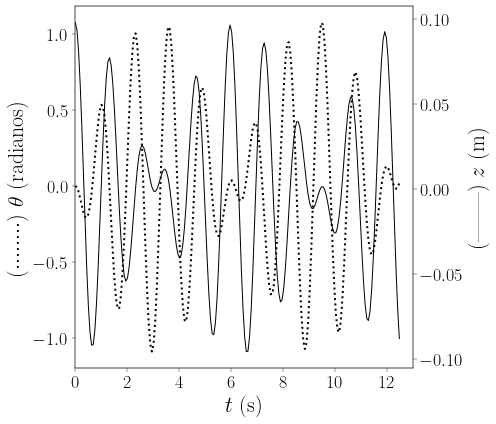

In [38]:
#plot expeerimental data and fit
fig, ax = plt.subplots(figsize=(7,6))
#ax.scatter(t_theta,theta,label='Dados experimentais',color='tab:purple',s=15)
ax.plot(t_model,theta_model, color='k',linestyle=':',label=r'$\theta(t)=A_2\sin(B_2t)\sin(C_2t)$',lw=2)
#ax.scatter(t_vert,z_vert*5,label='Dados experimentais',color='tab:orange',s=15)
ax.set_ylabel(r'$({\cdot}{\cdot}{\cdot}{\cdot}{\cdot}{\cdot}{\cdot}{\cdot})\ \theta$ (radianos)',fontsize=22)
ax.set_xlabel (r'$t$ (s)',fontsize=22)
ax.tick_params(axis='both',labelsize=18)

ax2=ax.twinx()
ax2.plot(t_model,z_model, color='k',linestyle='-',label=r'$z(t)=A_1\cos(B_1t)\cos(C_1t)$',lw=1,zorder=0)
ax2.set_ylabel(r'(--------)\ $z$ (m)',fontsize=22)
#ax2.set_xlabel (r'$t$ (s)',fontsize=18)
ax2.tick_params(axis='both',labelsize=18)
ax2.set_yticks(np.arange(-0.1, 0.10001, 0.05))
ax.set_xlim(0,13.00001)
#ax.legend()

ax.set_xticks(np.arange(0, 13.00001, 2))
#plt.grid()
plt.locator_params(axis='y', nbins=10)
ax.set_aspect('auto',adjustable='box')
plt.tight_layout()
fig.savefig('z-and-theta_result.pdf',dpi=100)
plt.show()